In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
companies = pd.read_csv('AML_LinearRegression.csv',delimiter=',',sep=',')

In [38]:
companies

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


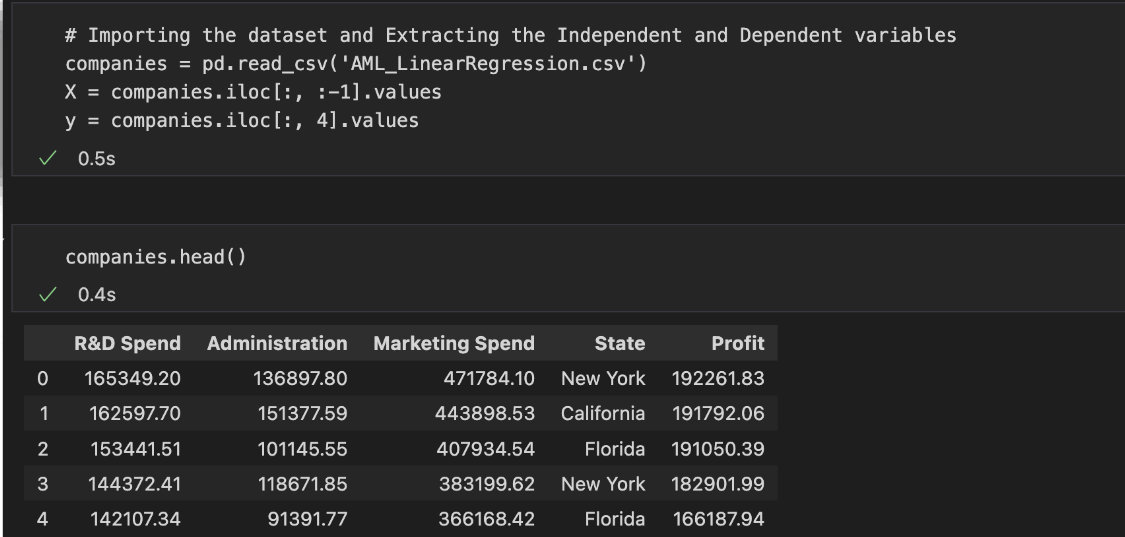

In [39]:
X=companies.iloc[:,:-1].values
y=companies.iloc[:,4].values

<AxesSubplot:>

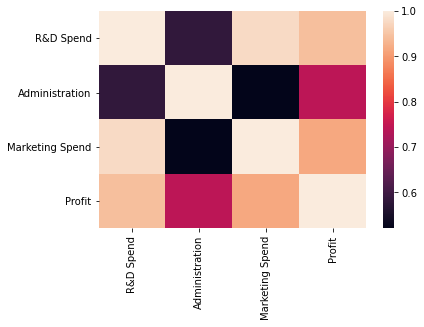

In [40]:
sns.heatmap(companies.corr())

In [41]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn. compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = ColumnTransformer( [('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
X = onehotencoder.fit_transform(X)

In [42]:
X=X[:,1:]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression
model_fit = LinearRegression()
model_fit.fit(X_train, y_train)


LinearRegression()

In [46]:
y_pred=model_fit.predict(X_test)
y_pred

array([ 81765.13238091,  80280.76255235,  87321.4768179 , 179016.7005438 ,
        81164.72399286, 110731.61359758, 177742.00173834,  83597.00718442,
       169544.04399981,  45707.40395426,  56900.77106322, 151676.8326812 ,
       122179.4113342 ,  48613.89614706, 177261.76715329,  72351.92078323,
       116494.74694292, 163175.66792172, 157789.94598928, 188564.34164071,
        86526.37333315,  77279.32773925, 184799.11015344,  75619.33707226,
        98328.60652941,  94222.06806226,  26711.85093059,  52283.50308879,
        59019.43102373, 229689.51469745, 119249.56532524, 105643.02768272,
       100842.66560293, 137952.25077662,  53656.45623058, 102522.02114866,
       192859.57892695, 174402.9167788 , 177888.24317681, 115866.9958013 ,
        95664.65325766, 164131.30686296, 101288.00445279,  42410.77656492,
       114606.82289765,  47846.02204955, 160222.46807555,  73269.60032551,
       161649.85445528, 130526.66534687, 189031.75924972, 177849.94294689,
        86070.64544156,  

In [50]:
print(model_fit.coef_)

[ 6.90895139e+04  0.00000000e+00  5.29521165e+03  5.29090775e+03
 -9.19761356e+04  5.26181671e+03  0.00000000e+00  1.07687131e+04
  1.07678363e+04  5.18458609e+03  7.96258229e+03  7.96162589e+03
  5.17828967e+03  1.07368324e+04  5.14585122e+03  0.00000000e+00
  1.06829543e+04  5.10719604e+03  5.09420470e+03  7.86925198e+03
  1.06445382e+04  1.06299529e+04  0.00000000e+00  1.06066004e+04
  5.00533763e+03  5.00087439e+03  4.98501383e+03  0.00000000e+00
  1.05210011e+04  7.70283544e+03  7.69733607e+03  7.68928618e+03
  4.90579062e+03  4.90061001e+03  4.84163105e+03  7.61779407e+03
  4.83613159e+03  7.60663582e+03  7.59691227e+03  4.81413404e+03
  4.77715263e+03  4.77547888e+03  4.76336423e+03  4.75770543e+03
  1.02887513e+04  0.00000000e+00  1.02293737e+04  1.02281782e+04
  4.66843988e+03  1.02222006e+04  0.00000000e+00  1.02092093e+04
  1.02021159e+04  1.01950224e+04  4.62468383e+03  7.38530508e+03
  7.37805225e+03  0.00000000e+00  0.00000000e+00  1.00983447e+04
  1.00942799e+04  0.00000

In [51]:
print(model_fit.intercept_)

-81668.37093449797


In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8629317277831641